# bit.ly/2lKX4w0 (소문자 L)

파일 -> .ipynb 다운로드 -> 구글드라이브에 업로드하여 사용

# 사후 실습 평가 II

In [1]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,
세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.
'''


'\n사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,\n세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.\n'

# Data Loading

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [0]:
rides.drop(['casual', 'registered'], axis=1, inplace=True)

# CODE :  퇴근시간 컬럼을 만들라.

**조건**
1. 17,18,19 시를 퇴근시간이라고 한다.
2. gow 컬럼을 만들고 17, 18, 19 시면 1로 표시. 그렇지 않으면 0으로 표시한다.

In [0]:
## easy sol
rides['gow'] = 0
rides.loc[ rides['hr']==17, ['gow']] = 1
rides.loc[ rides['hr']==18, ['gow']] = 1
rides.loc[ rides['hr']==19, ['gow']] = 1




# Dummy Variable

Season, weathersit, mnth, hr, weekday 등의 Categorical Variable들을 Dummy로 만들어라.

In [5]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,cnt,gow,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Scaling


In [0]:
quant_features = ['temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [7]:
'''
위에서 쓰인 Dictionary 잠깐 짚어보기.
Dictionary의 각각의 원소는 key : value 쌍으로 되어 있다.
'''

scaled_features

{'hum': [0.6272288394038822, 0.1929298340629125],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

### Splitting the data into training, testing, and validation sets

맨 마지막의 21일을 test_set으로, 그리고 마지막의 81~22 (60일)을 validation set으로, 나머지를 Training set으로 둔다.<br>
물론 이것도 [scikit-learn에서 한방](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에 할 수 있으나 우리는 직접한다!

굳이 Validations set을 왜 사용하는지는, 이론만 달리는 날에 신나고 자세하게 달립시다!

In [8]:
test_data = data[-21*24:]
val_data = data[-81*24:-21*24]
train_data = data[:-81*24]

target_fields = ['cnt']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

train_targets.head()

,cnt
0,16
1,40
2,32
3,13
4,1


# Modeling I : simple Linear Regression

## 조건

1. slr 에 linear regression을 선언하고 학습하라.
2. 예측값을 담는다.
    * train_pred : 트레이닝셋의 예측값
    * val_pred : 벨리데이션셋의 예측값
    * test_pred : 테스트셋의 예측값


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# 모델 준비
slr = LinearRegression()

# 모델 training
slr.fit(train_features, train_targets)

# Training & Validation set에서의 예측값 준비
train_pred, val_pred = slr.predict(train_features), slr.predict(val_features)
test_pred = slr.predict(test_features)

# validation set 위의 시각화이다. 동작하는지 확인할 것

In [11]:
val_targets.shape

(1440, 1)

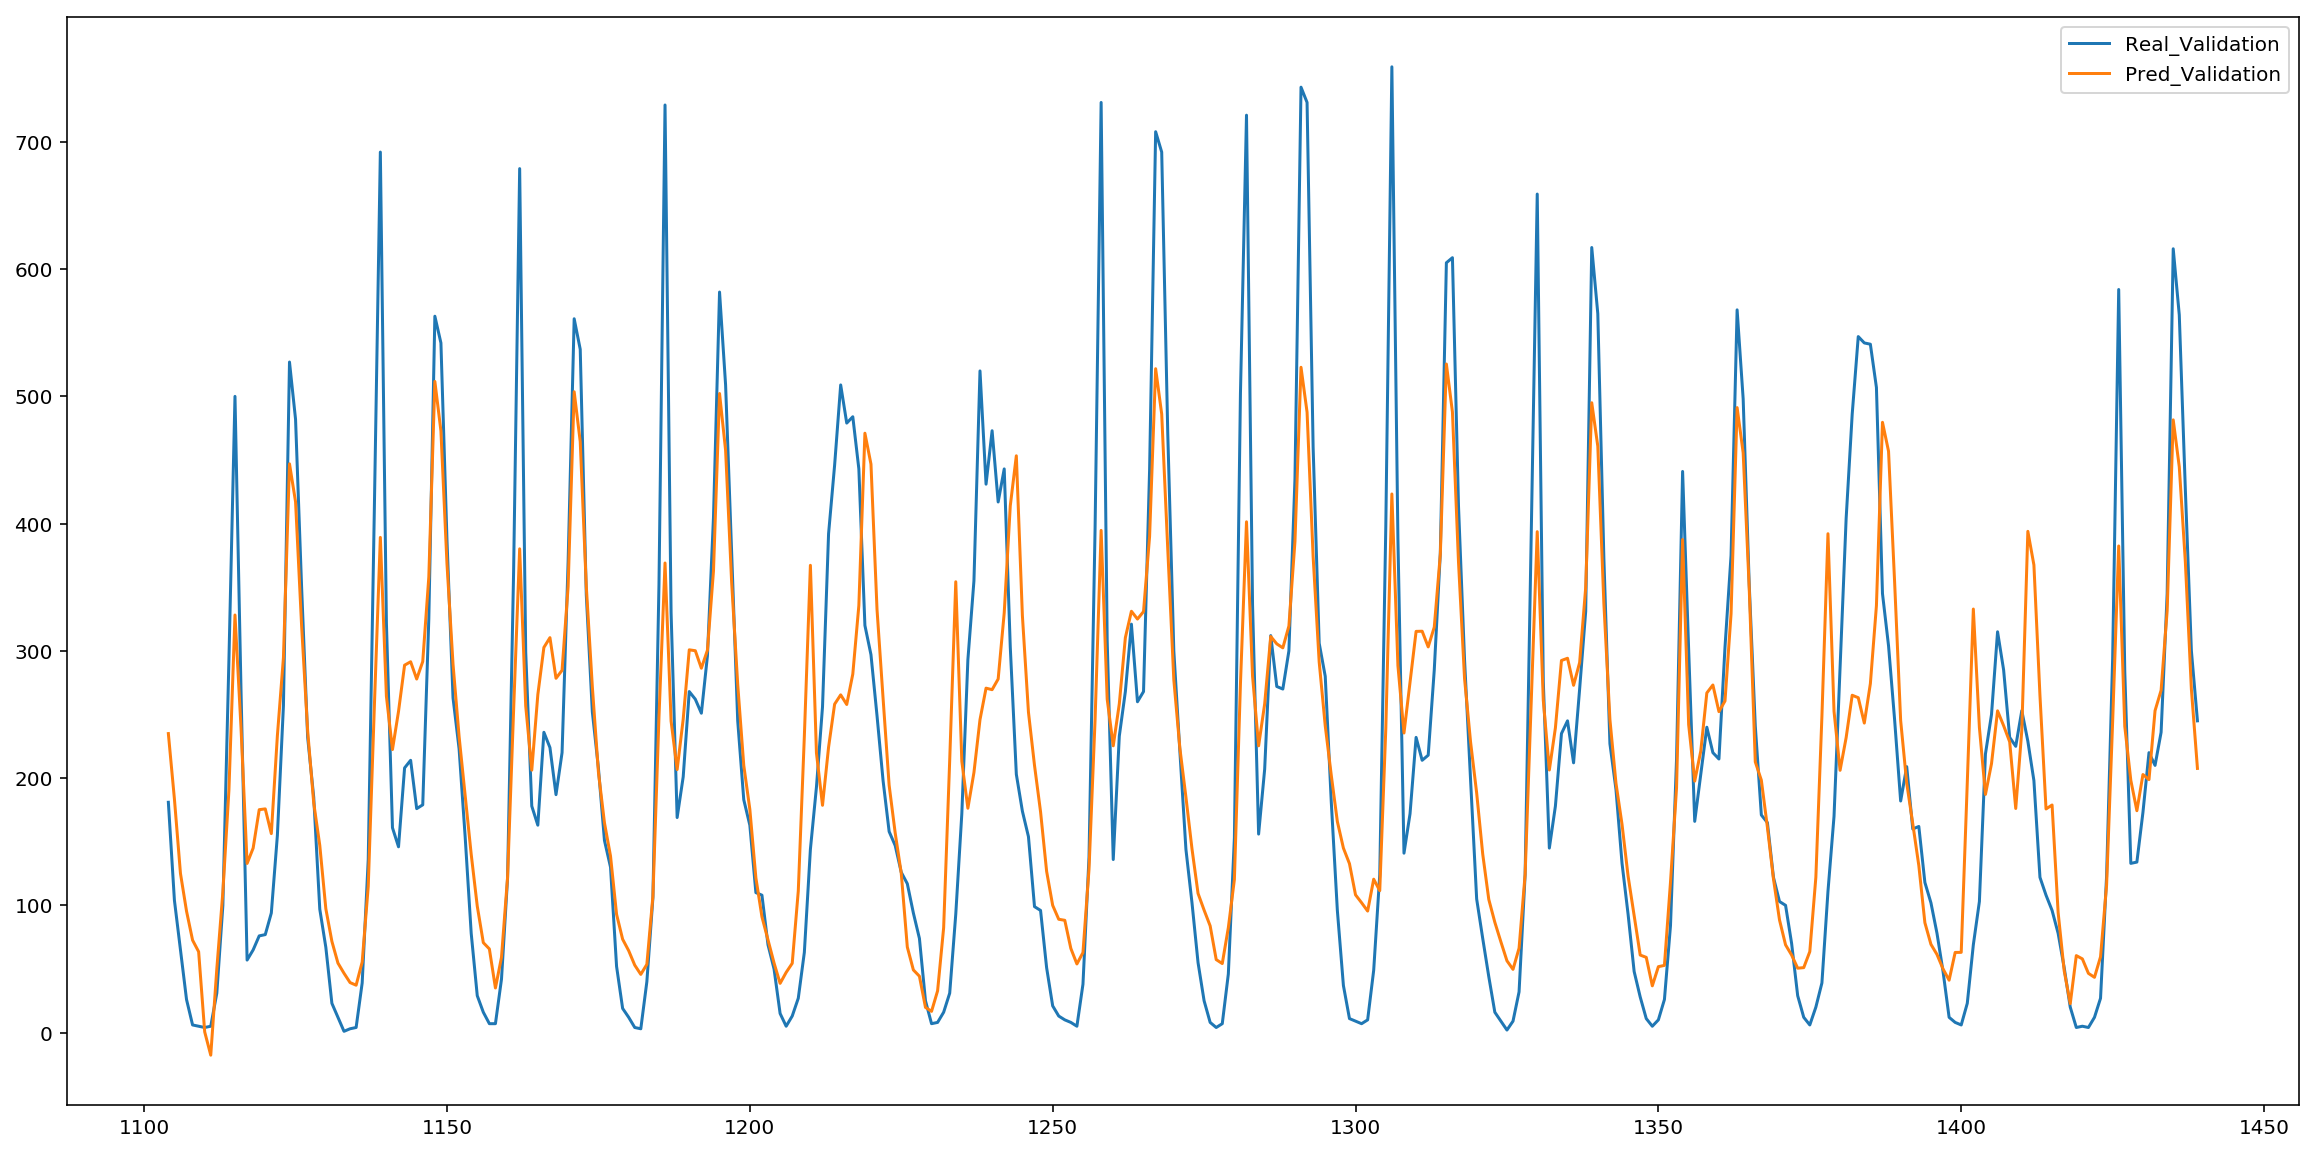

In [12]:
x = list(range(1440))
rd = -24*14

plt.figure(figsize=(20,10))
plt.plot(x[rd:], val_targets['cnt'][rd:] )
plt.plot(x[rd:], val_pred[rd:])
plt.legend(['Real_Validation', 'Pred_Validation'])
plt.show()

# Q1. val_targets 와 val_pred 사이의 rmse를 구하라

* 정수만 적을 것!

In [13]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets, val_pred))

123.38268492852627

# Q2. val_targets와 val_pred의 퇴근시간때의 rmse를 구하라.

* 정수만 적을 것!
* 다음 코드를 이용하면 편리할 수 있다.

```
val_features['gow']
## 퇴근시간이 1, 나머지가 0으로 되어 있다.
```

In [15]:
gow_real = val_targets[val_features['gow']==1]
gow_pred = val_pred[val_features['gow']==1]

np.sqrt(mean_squared_error(gow_real, gow_pred ))

175.03831334901133

# Q3. val_targets와 val_pred의 퇴근시간이 아닐 때의 rmse를 구하라.

* 정수만 적을 것!

In [16]:
ngow_real = val_targets[val_features['gow']==0]
ngow_pred = val_pred[val_features['gow']==0]

np.sqrt(mean_squared_error(ngow_real, ngow_pred ))

113.925766683449

# Modeling II : 퇴근 시간용 linear regression

1. tlr 에 linear regression을 선언하고 학습하라.
2. 'gow'컬럼을 이용하여 트레이닝 셋에서 퇴근시간만 학습 데이터로 사용한다.
2. 예측값을 담는다.
    * train_pred_t : 트레이닝셋의 예측값
    * val_pred_t : 벨리데이션셋의 예측값

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# 모델 준비
tlr = LinearRegression()

# 모델 training
tlr.fit(train_features[train_features['gow']==1], train_targets[train_features['gow']==1])

# Training & Validation set에서의 예측값 준비
train_pred_t, val_pred_t = tlr.predict(train_features[train_features['gow']==1]), tlr.predict(val_features[val_features['gow']==1])

# Q4. 퇴근시간의 val_targets와 val_pred_t 사이의 rmse를 구하라.
* 정수만 작성한다!

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets[val_features['gow']==1], val_pred_t))

124.99326057651741

# Q5. 2번의 rmse와 4번의 rmse 에 대하여 다음 질문에 답하여라.

## Q5.1 : 개선되었는가?

## Q5.2 : 차이를 구하라. (계산후 정수만 적을 것)

In [20]:
# 개선됨

175.03831334901133-124.99326057651741

50.04505277249392

# 참고 퇴근시간 플롯

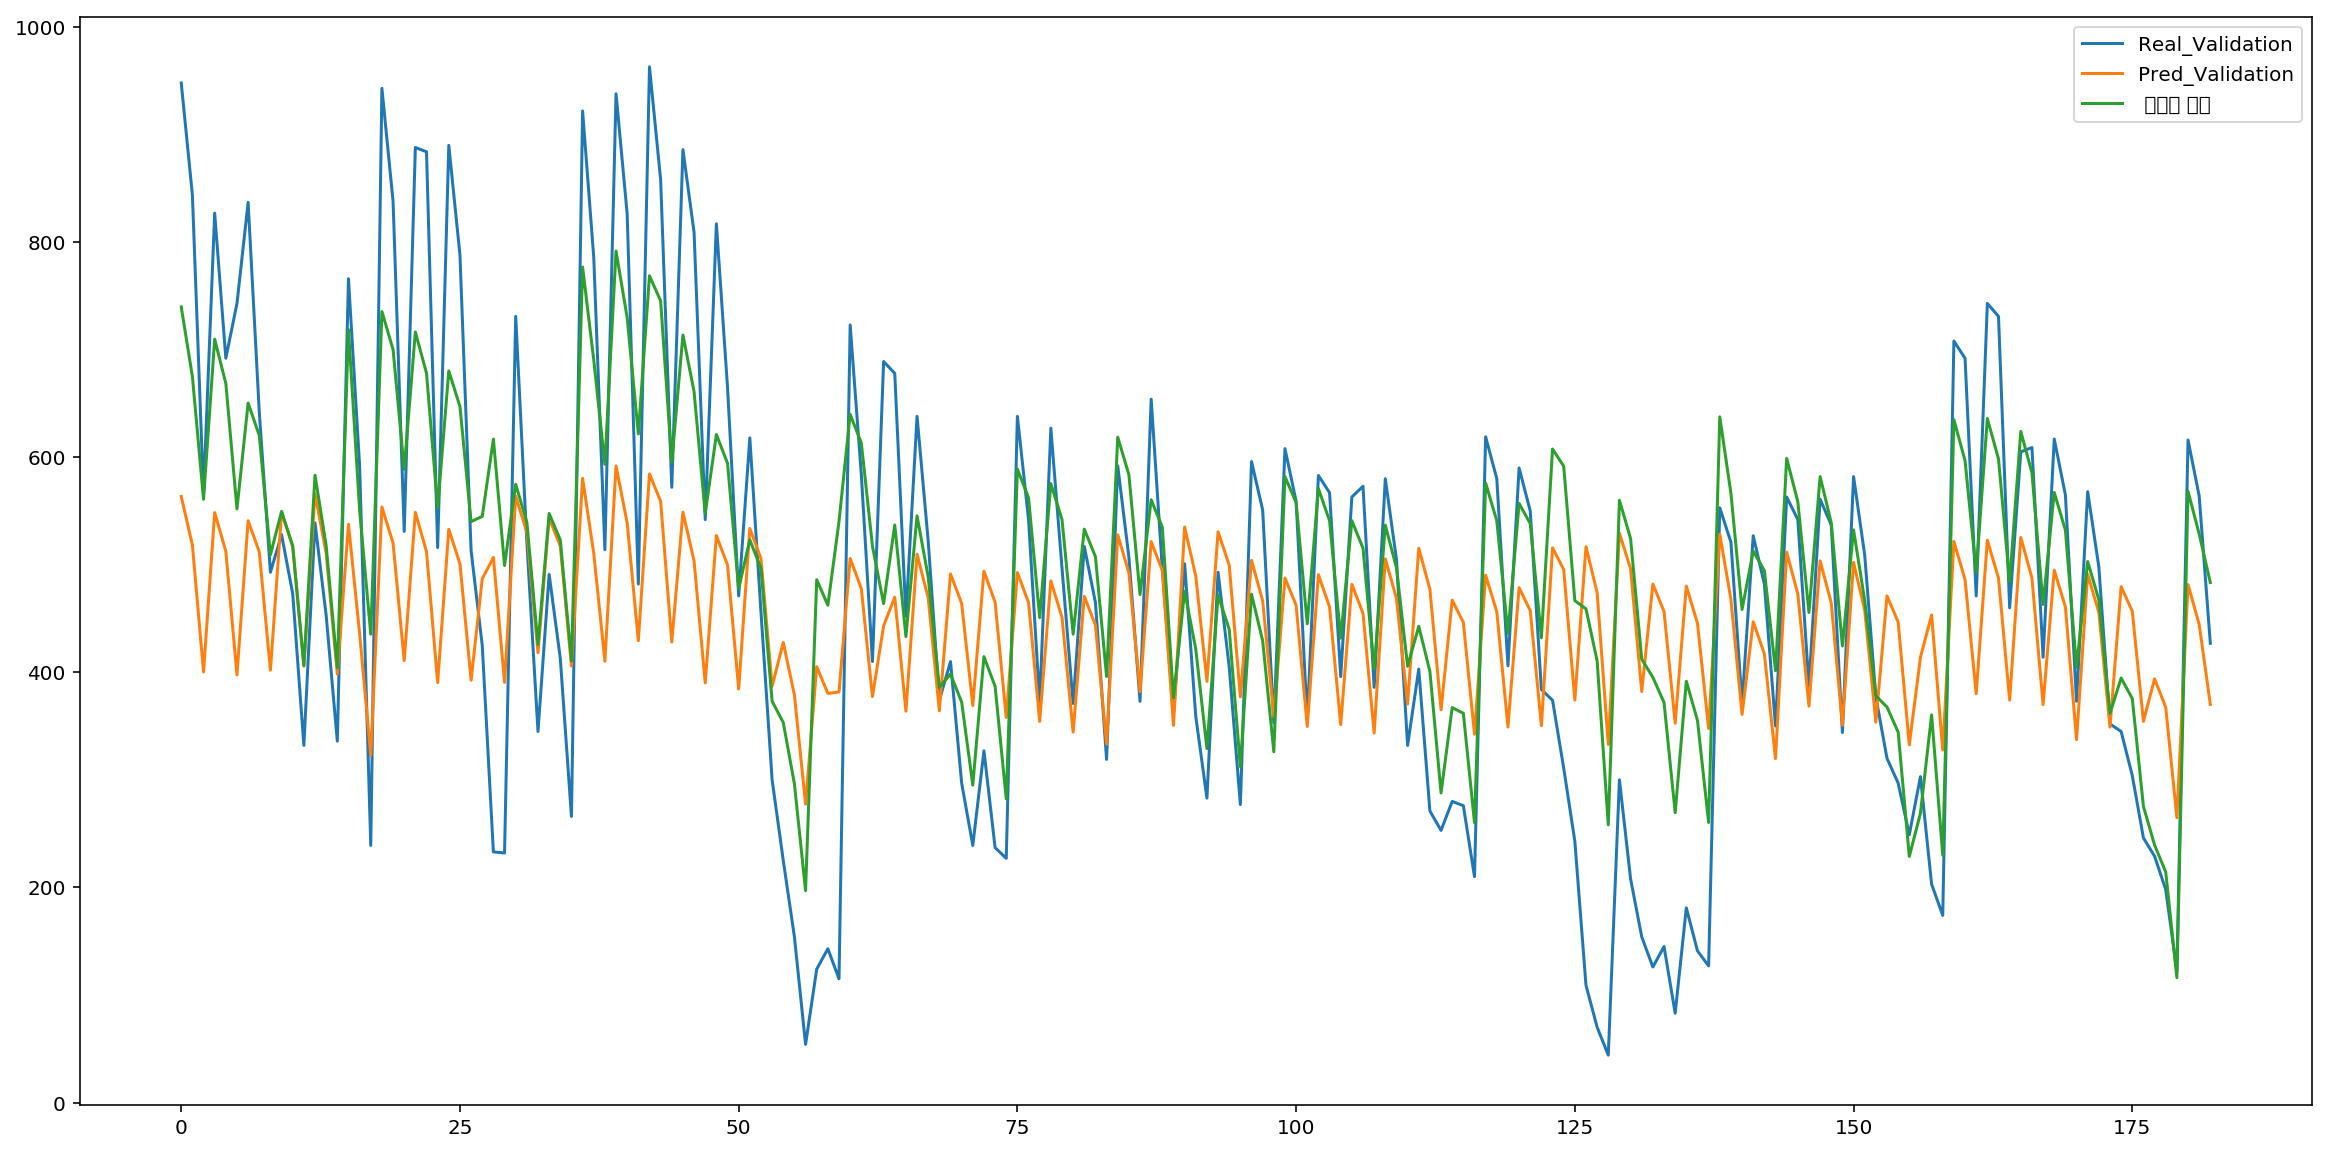

In [0]:
x = list(range(183))

plt.figure(figsize=(20,10))
plt.plot(x, val_targets['cnt'][val_features['gow']==1] )
plt.plot(x, val_pred[val_features['gow']==1])
plt.plot(x, val_pred_t)
plt.legend(['Real_Validation', 'Pred_Validation', ' 퇴근용 예측'])
plt.show()